# Assignment 1

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. 
Perform following tasks: 
1.  Pre-process the dataset. 
2.  Identify outliers. 
3.  Check the correlation. 
4.  Implement linear regression and random forest regression models. 
5.  Evaluate the models and compare their respective scores like R2, RMSE, etc. 
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 

## 1.Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
# import datetime as dt


In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [9]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.dtypes
df.pickup_datetime = pd.to_datetime(df.pickup_datetime) 

In [13]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [15]:
df = df.drop('pickup_datetime',axis=1)


In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


## 2.  Identify outliers 

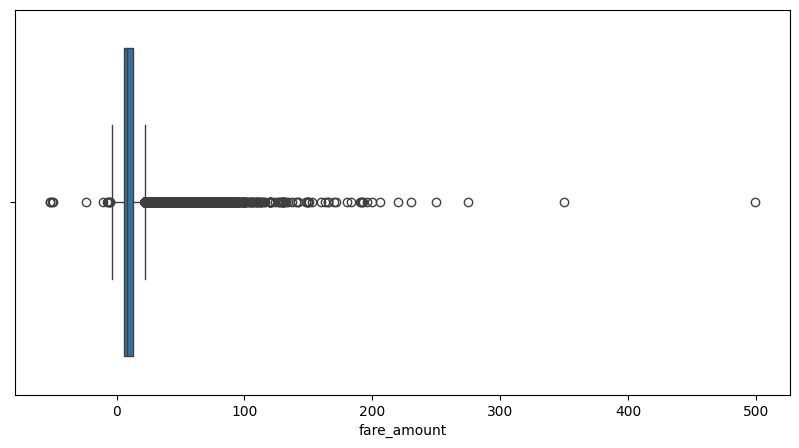

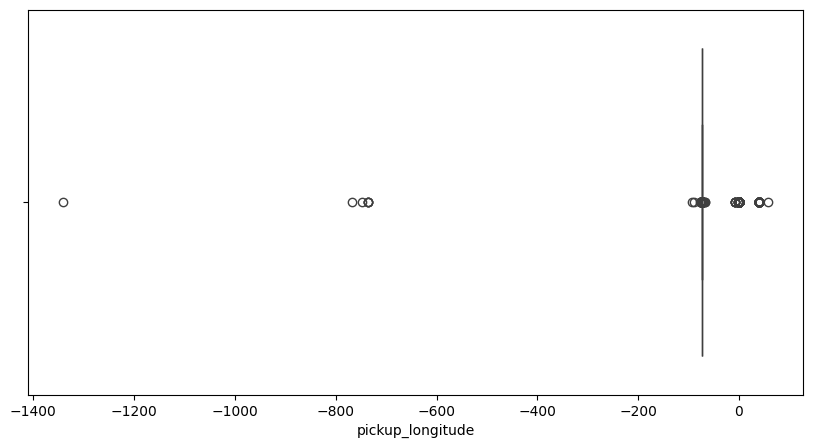

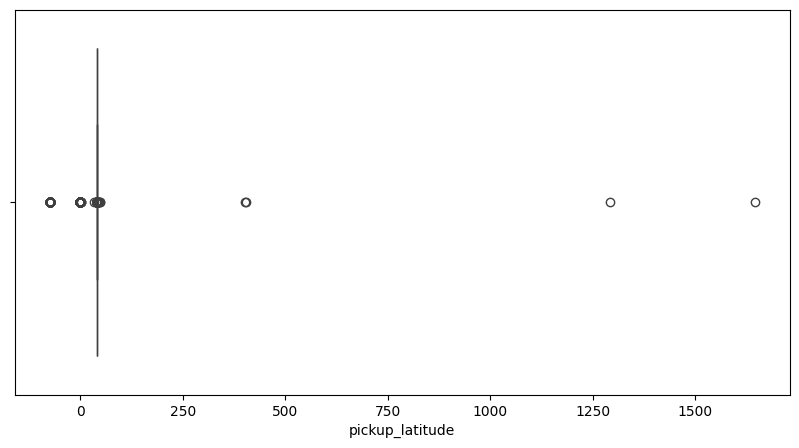

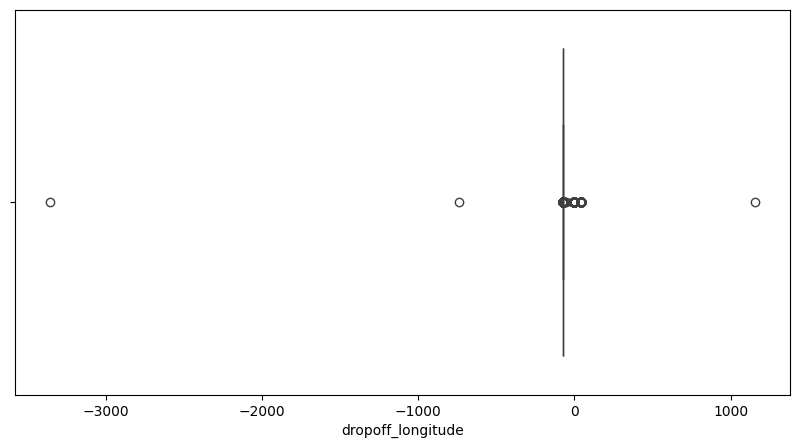

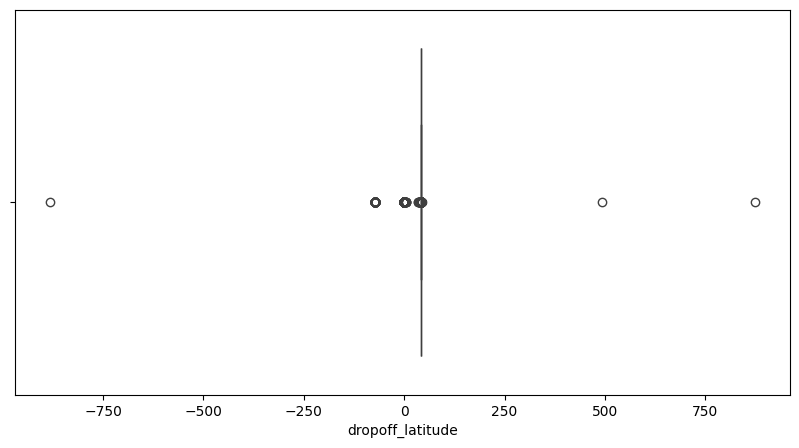

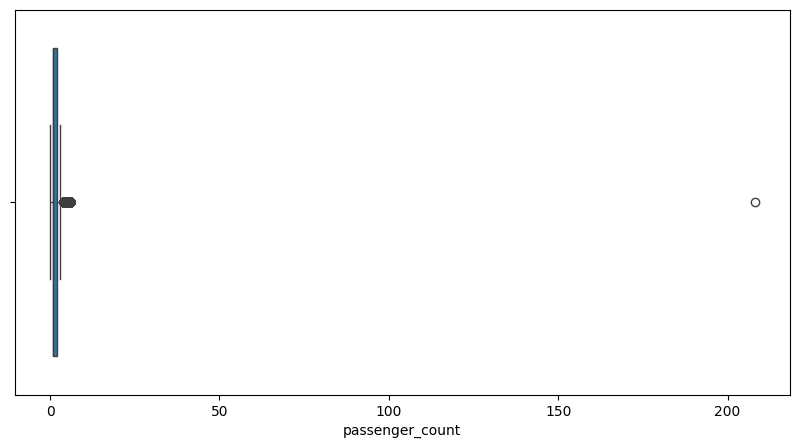

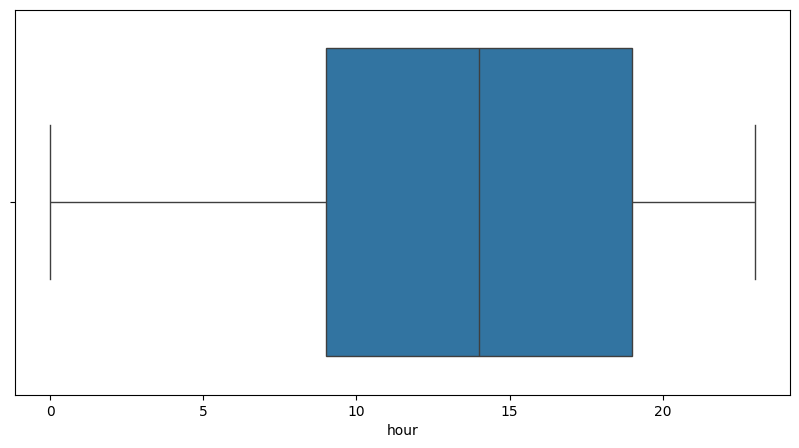

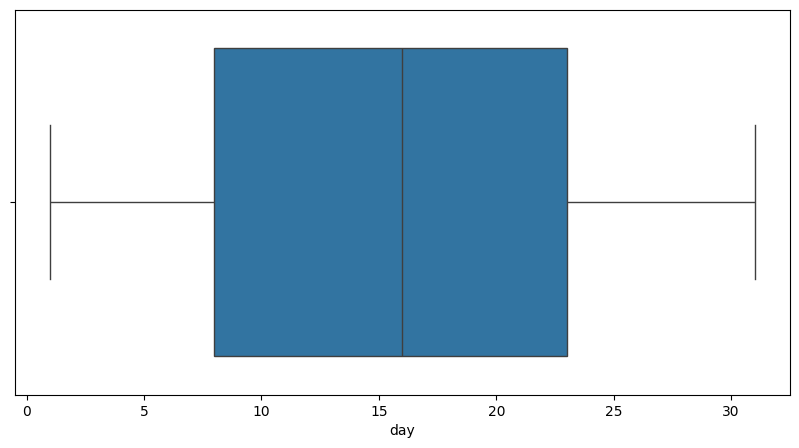

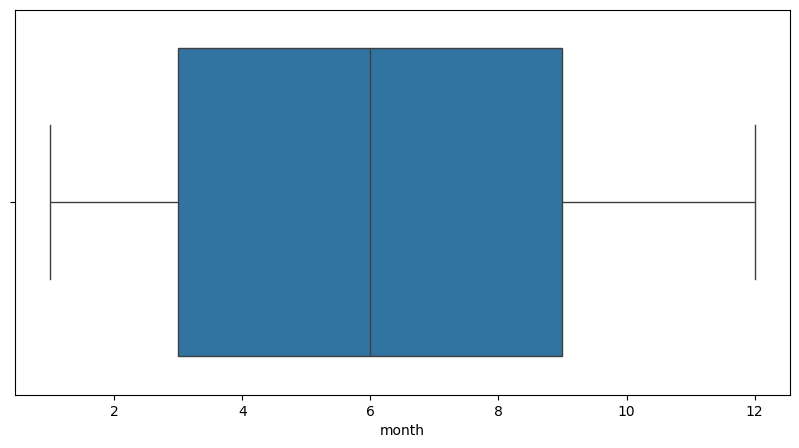

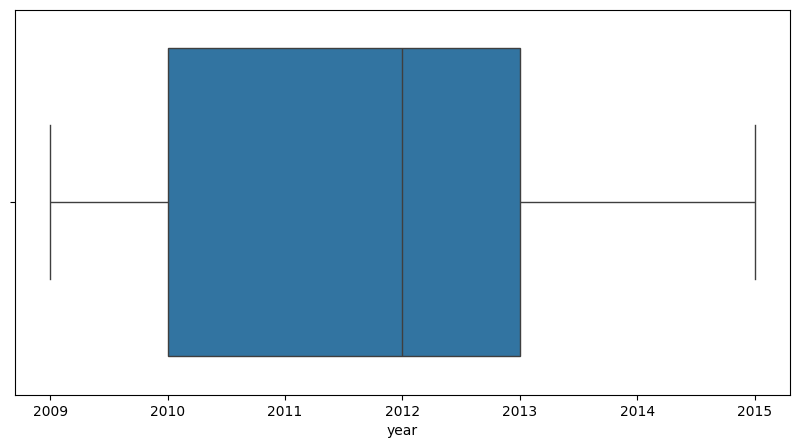

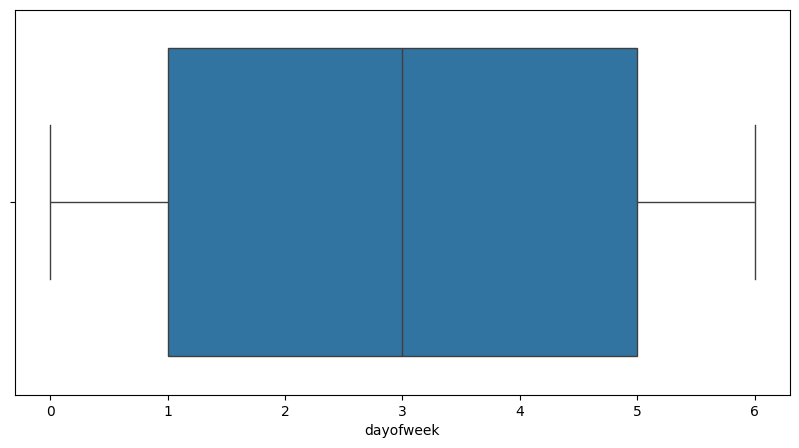

In [17]:
def plot_Outliers(df1,col):
    for col in df1.select_dtypes(exclude=['object']):
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df1,x=col)

plot_Outliers(df,df.columns)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

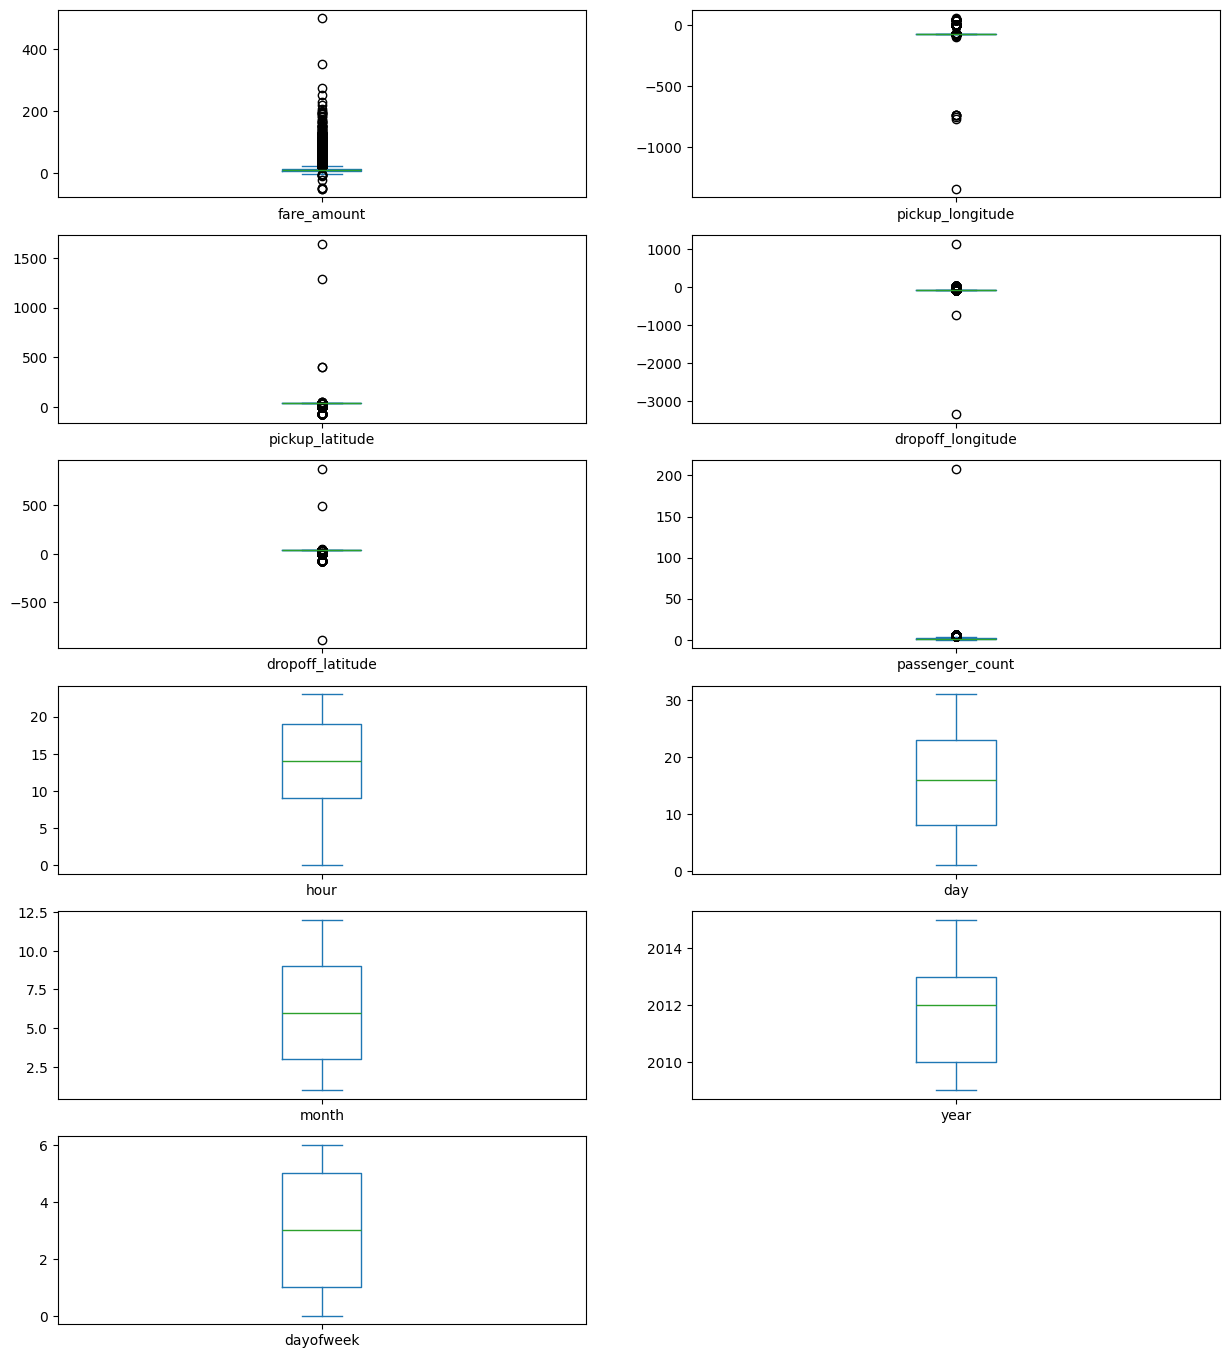

In [18]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [19]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker) #Clip function will clip all values below lower_whisker and above upper_whisker to lower_whisker and upper_whisker respectively
    return df1

def treat_outliers_all(df1 , col_list):
    #print(col_list)
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [20]:
df = treat_outliers_all(df , df.columns)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

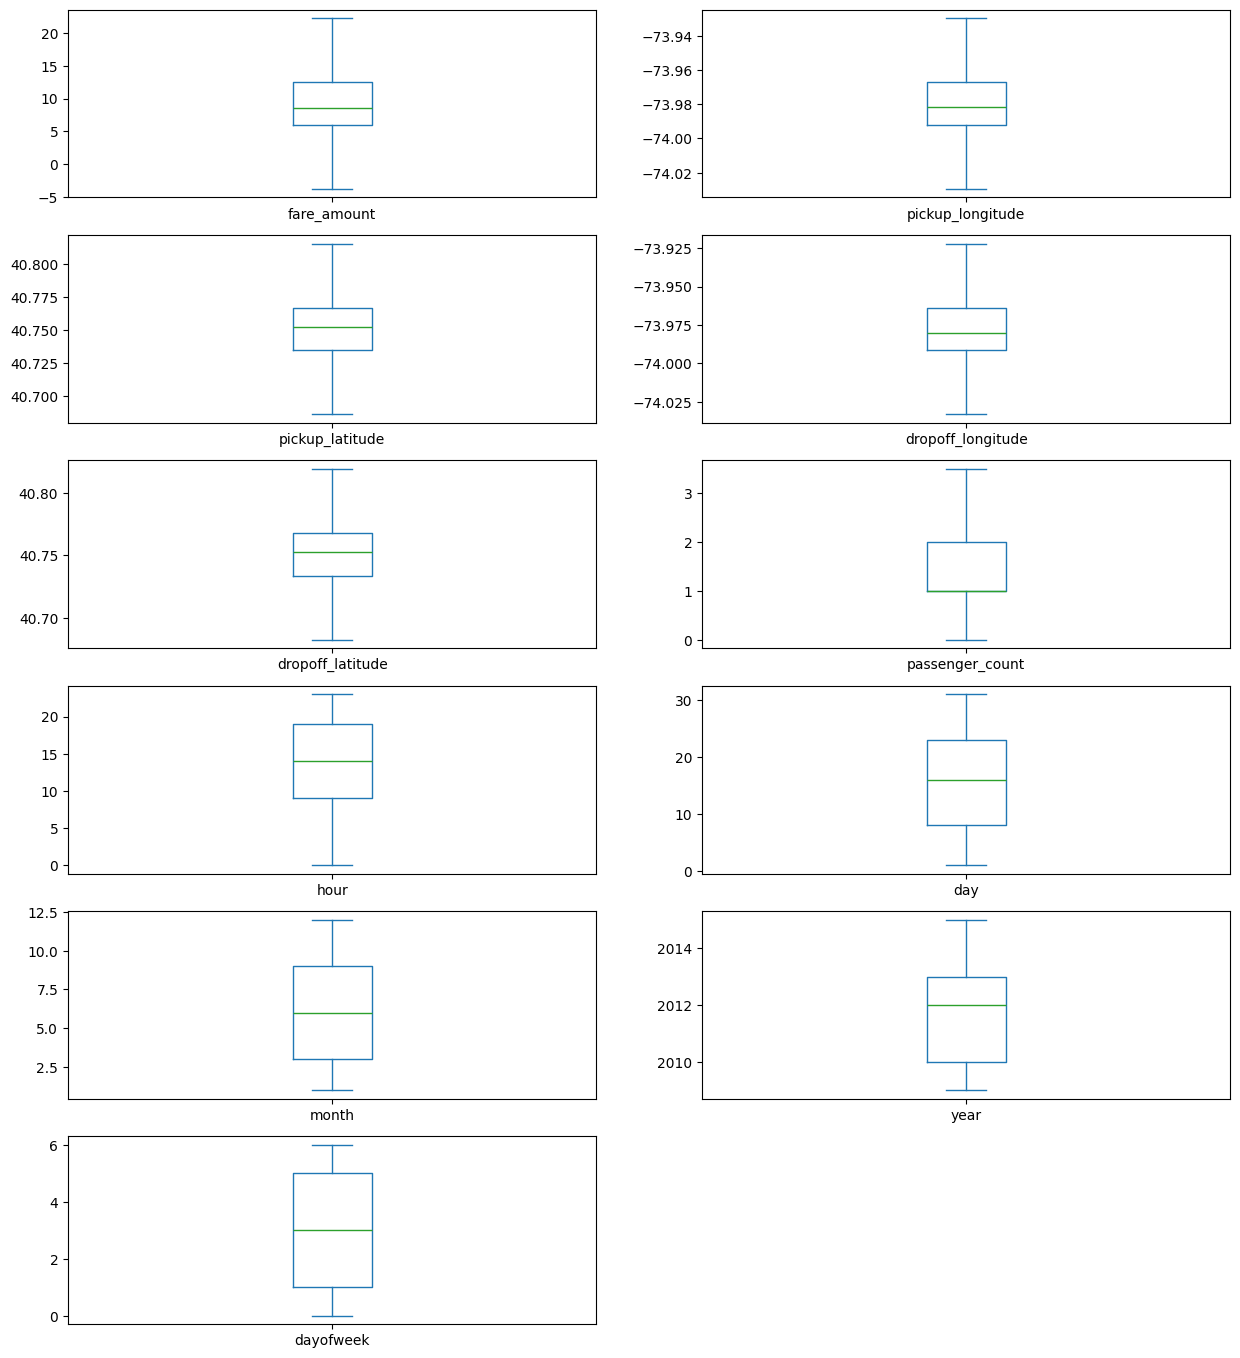

In [21]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

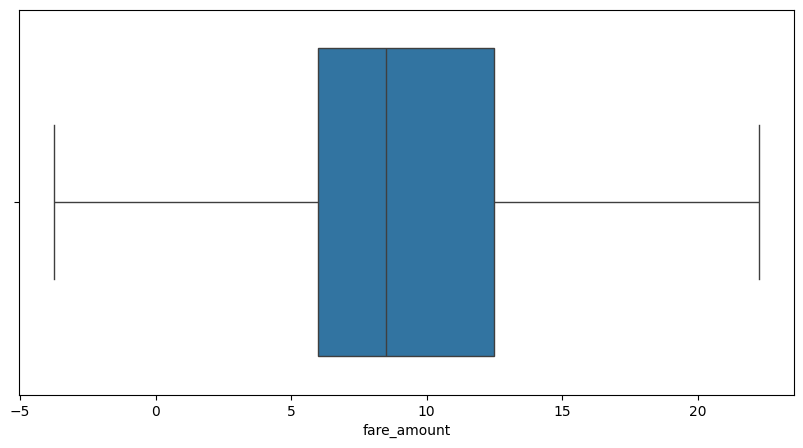

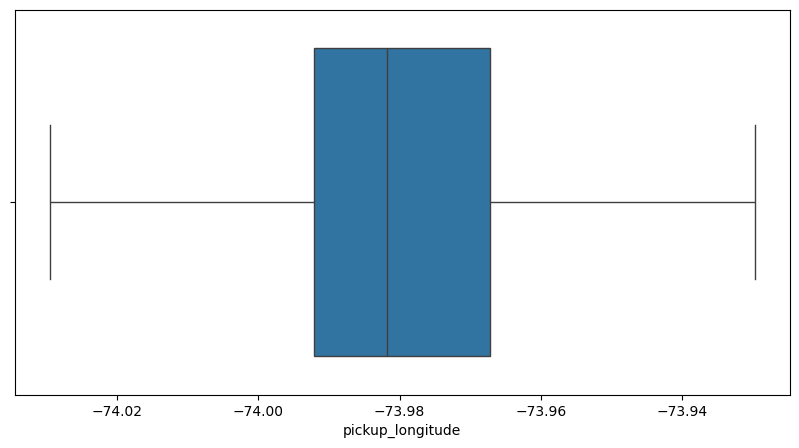

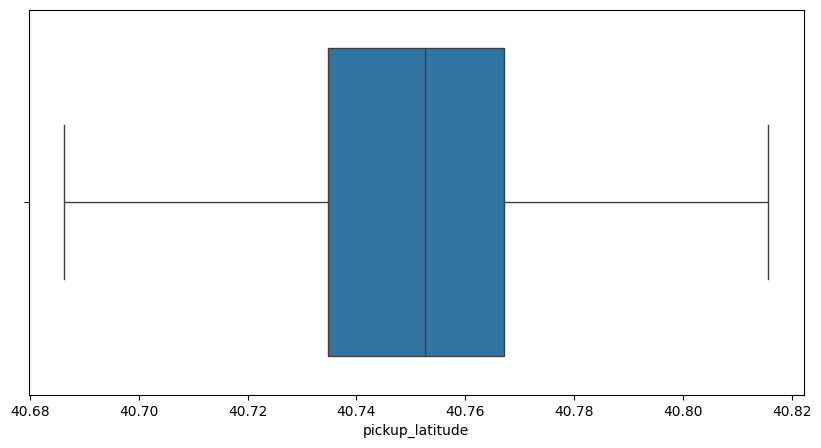

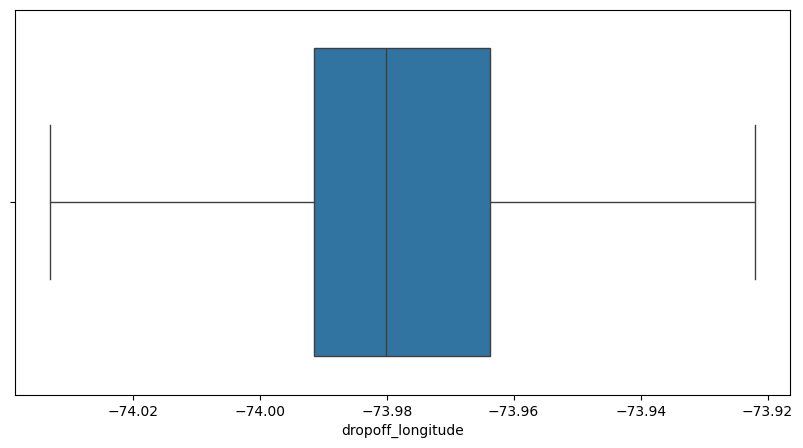

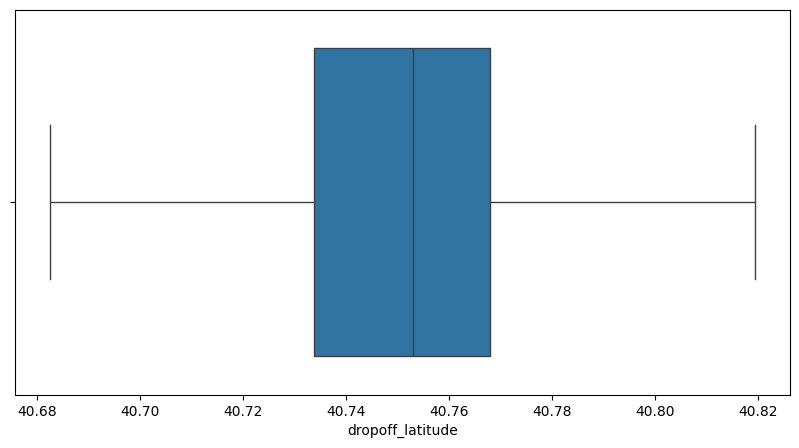

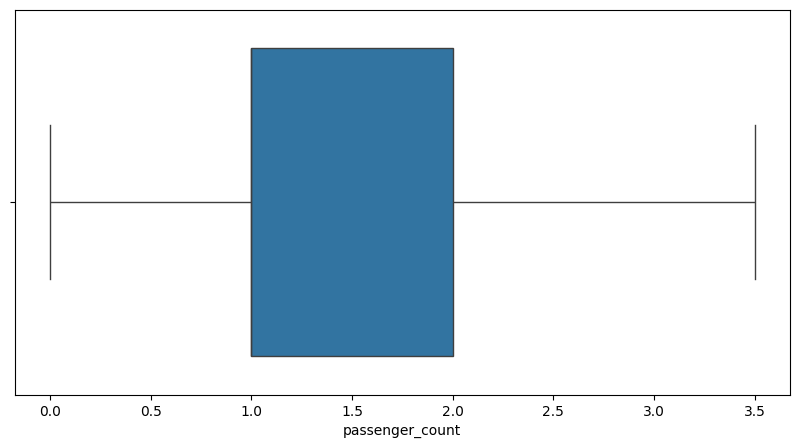

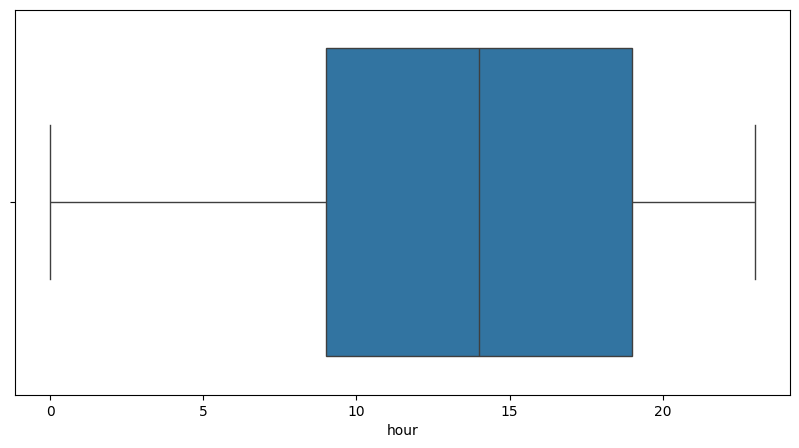

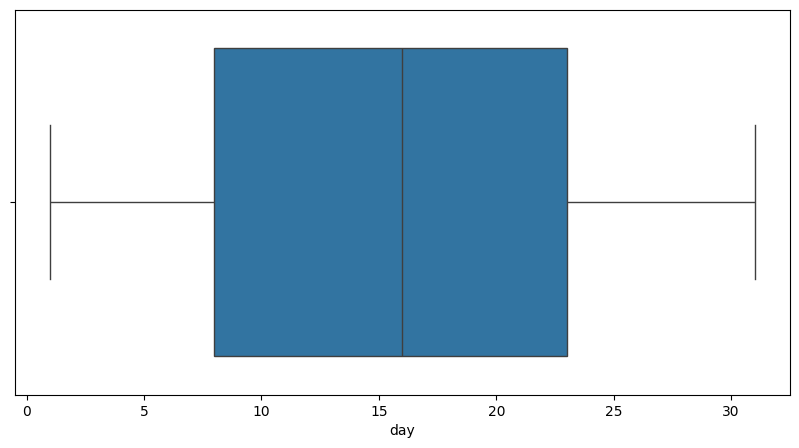

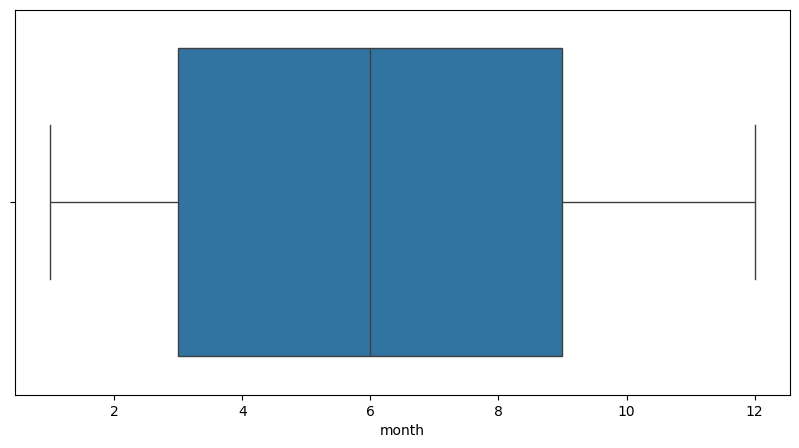

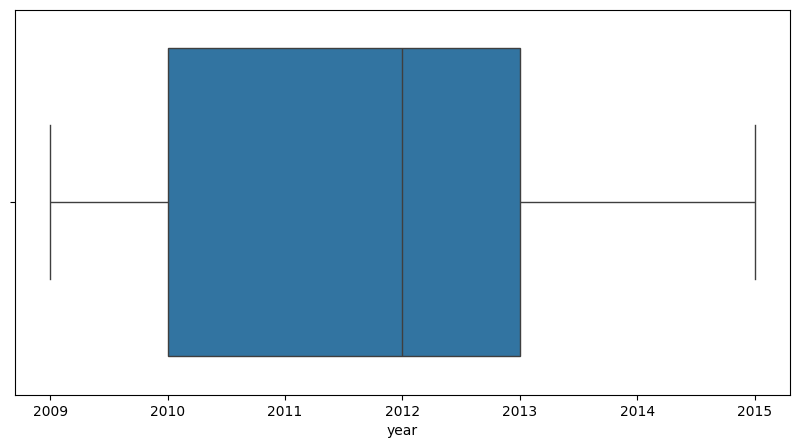

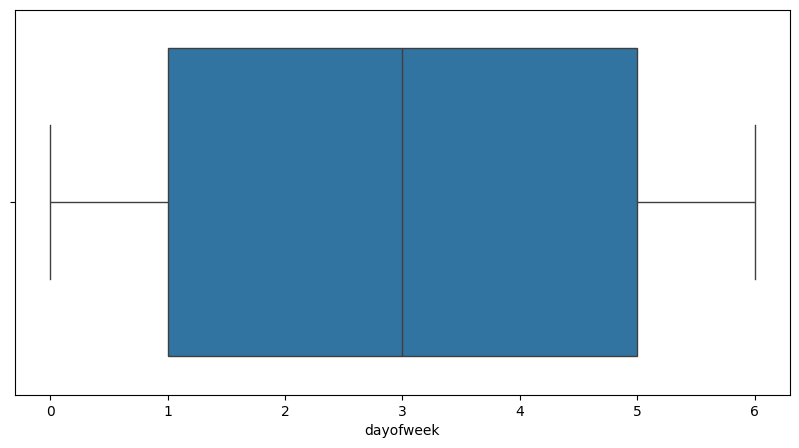

In [22]:
plot_Outliers(df,df.columns)

In [23]:
# def distance(lat1, lon1, lat2, lon2):
#     # Convert degrees to radians
#     lon1, lon2, lat1, lat2 = map(np.radians, [lon1, lon2, lat1, lat2])
    
#     # Compute differences
#     diff_lon = lon2 - lon1
#     diff_lat = lat2 - lat1
    
#     # Haversine formula
#     a = np.sin(diff_lat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(diff_lon / 2.0) ** 2
#     c = 2 * np.arcsin(np.sqrt(a))
    
#     # Radius of Earth in kilometers (mean radius)
#     radius_earth_km = 6371
    
#     # Calculate the distance
#     distance_km = radius_earth_km * c
    
#     return distance_km
# temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
# temp.head()
# df_new = df.copy()
# df_new['Distance'] = temp
# df = df_new
# df.head()


In [24]:
# !pip install haversine

import pandas as pd
import haversine as hs

# Assuming df is already loaded and pre-processed
def calculate_distance(df):
    travel_dist = []
    for index, row in df.iterrows():
        long1, lat1, long2, lat2 = row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']
        loc1 = (lat1, long1)  # Pickup location
        loc2 = (lat2, long1)  # Dropoff location
        distance = hs.haversine(loc1, loc2)
        travel_dist.append(distance)
    
    df['dist_travel_km'] = travel_dist
    return df

# Apply the function to your dataframe
df = calculate_distance(df)
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683129
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457411
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,3.544566
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.390494
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,1.908330


In [25]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]

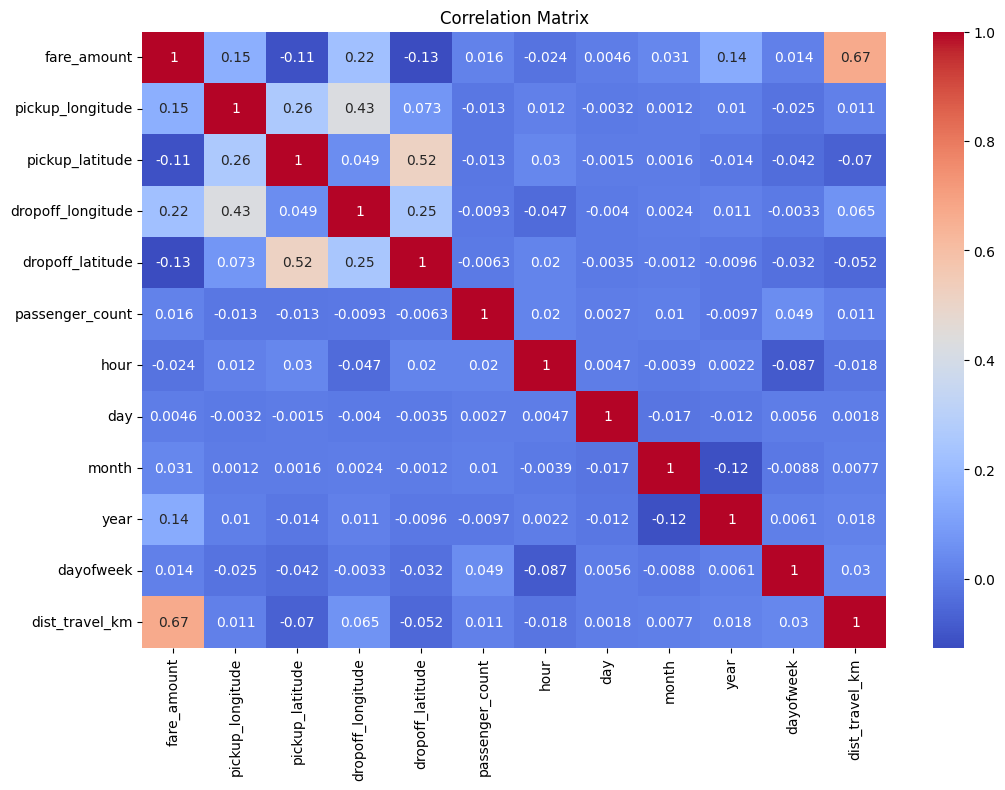

In [26]:
corr = df.corr() 
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix') 
plt.show()

In [27]:
# df.drop(columns=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],inplace=True)

In [28]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683129
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457411
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,3.544566
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.390494
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,1.908330


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683129
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457411
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,3.544566
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.390494
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,1.908330


In [32]:
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [34]:
# Evaluate the models
# Linear Regression Metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
# Random Forest Metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [35]:
print(f"Linear Regression - R2: {r2_lr}, RMSE: {rmse_lr}, MSE: {mse_lr}, MAE: {mae_lr}")
print(f"Random Forest - R2: {r2_rf}, RMSE: {rmse_rf}, MSE: {mse_rf}, MAE: {mae_rf}")

Linear Regression - R2: 0.5121597230774175, RMSE: 3.8041803883213974, MSE: 14.47178842688914, MAE: 2.6992989236512295
Random Forest - R2: 0.7877088636556794, RMSE: 2.509505815286851, MSE: 6.297619436958521, MAE: 1.5780725313194446


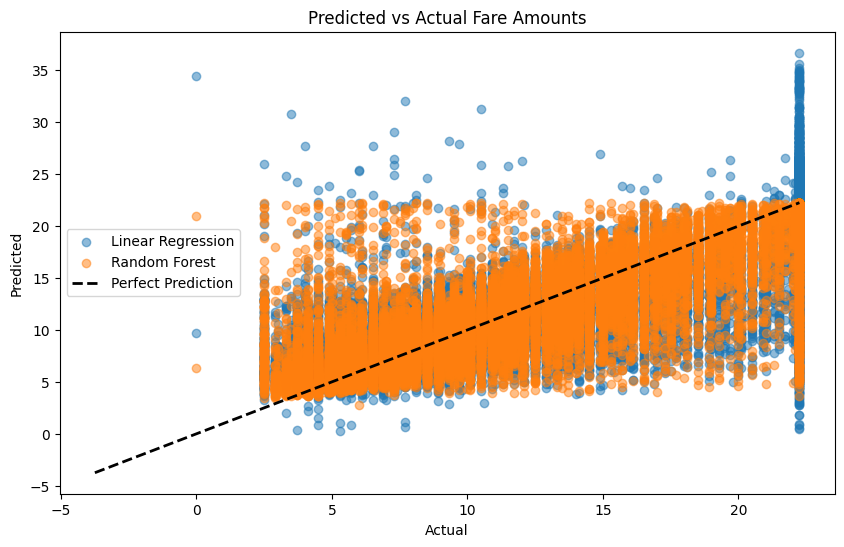

In [36]:
# Predicted vs Actual - Linear Regression and Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Fare Amounts')
plt.legend()
plt.show()

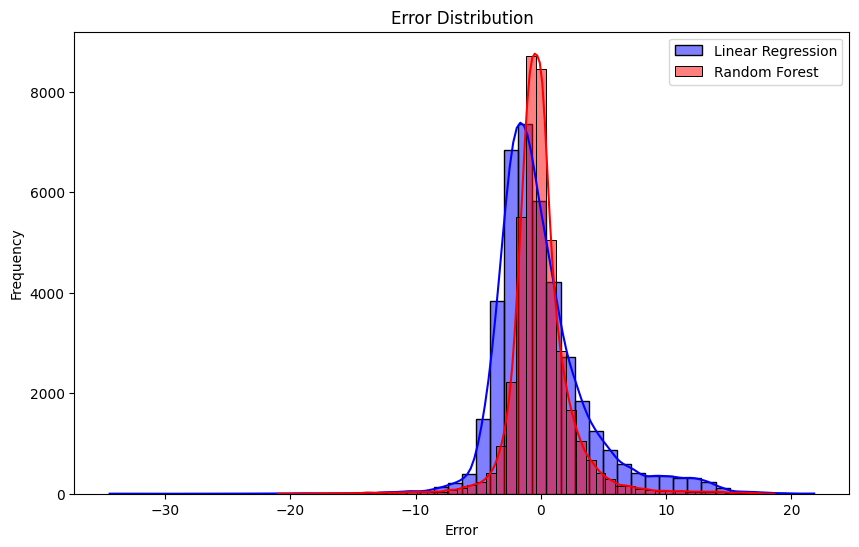

In [37]:
# Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_lr, bins=50, kde=True, label='Linear Regression', color='blue')
sns.histplot(y_test - y_pred_rf, bins=50, kde=True, label='Random Forest', color='red')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [38]:
if r2_rf > r2_lr:
    print("Random Forest performs better.")
else:
    print("Linear Regression performs better.")

Random Forest performs better.
